In [1]:
a = {'positive': 25000,
'negative' : 25000}



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Class Imbalance in Dataset')

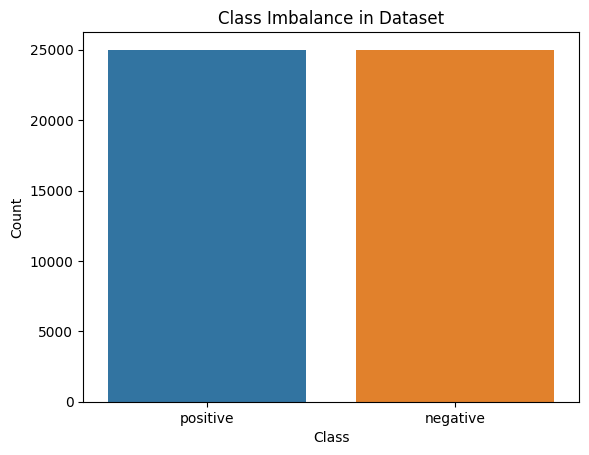

In [6]:
sns.barplot(x = list(a.keys()), y = list(a.values()))
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Imbalance in Dataset")

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the dependencies

In [1]:
'''
Following packages, libraries and frameworks are used for data understanding, cleaning and modeling purpose.
1. NumPy : Performing image and array manipulations
2. Pillow : Loading and working with jpg images
3. torch : PyTorch framework for working with tensors, GPU and models
4. Sklearn : Useful library that provides very useful functions mainly used to evaluate the performance of our model
Lets start with the number of classes and number of samples in each class in the entire dataset.
5. Seaborn and Matplotlib : Data visualization
'''

import os
import torch
import torch.nn as nn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import pandas as pd
import seaborn as sns
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Data Understanding

In [3]:
df = pd.read_csv('IMDB Dataset.csv') # reading the csv file

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.shape

(50000, 2)

In [6]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [7]:
df.sentiment = df.sentiment.replace({'positive': 1, 'negative': 0})

In [8]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [9]:
from wordcloud import WordCloud

<b> Removing URLs from the text

In [10]:
import re
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

<b> Remove HTML tags

In [11]:
def rm_html(text):
    return re.sub(r'<[^>]+>', '', text)

<b> Remove Emojis

In [12]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' ', string)

<b> Remove Unwanted Characters

In [13]:
def removeunwanted_characters(document):
    # remove user mentions
    document = re.sub("@[A-Za-z0-9_]+"," ", document)
    # remove hashtags
    document = re.sub("#[A-Za-z0-9_]+","", document)
    # remove punctuation
    document = re.sub("[^0-9A-Za-z ]", "" , document)
    #remove emojis
    document = remove_emoji(document)
    # remove double spaces
    document = document.replace('  ',"")
    return document.strip()

<b> Remove unnecessary whitespaces

In [14]:
def rm_whitespaces(text):
    return re.sub(r' +', ' ', text)

<B> Remove Punctutations

In [15]:
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import RegexpTokenizer

def remove_punct(text):
    tokenizer = RegexpTokenizer(r"\w+")
    lst=tokenizer.tokenize(' '.join(text))
    return lst

<b> Remove Stopwords

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
custom_stopwords = ['@', 'RT']
stop_words.update(custom_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
def remove_stopwords(text_tokens):
    result_tokens = []
    for token in text_tokens:
        if token not in stop_words:
            result_tokens.append(token)
    return result_tokens

<b> Convert to lower order

In [18]:
def lower_order(text):
    small_order_text = text.lower()
    return small_order_text

<B> Stemming

In [19]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def lemmatization(token_text):
    lemma_tokens = []
    wordnet = WordNetLemmatizer()
    lemmatized_tokens = [wordnet.lemmatize(token, pos = 'v') for token in token_text]
    return lemmatized_tokens

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<b> Tokenization

In [20]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

# preprocessing
def tokenize(text):
    return word_tokenize(text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<b> Custom Pipeline to clean text

In [21]:
def custom_cleaning_pipeline(text):   
    text = lower_order(text)
    text = remove_urls(text)
    text = rm_html(text)
    text = remove_emoji(text)
    text = removeunwanted_characters(text)
    text = rm_whitespaces(text)
    return text

In [22]:
custom_cleaning_pipeline(df['review'].iloc[0])

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictur

`After cleaning the messy text data, we need to preprocess it. First, we will tokenize the text and perform Lemmatization. After tokenizaation, we will remove punctuations and stopwords. For Tokenization, we will split the entire text into individual words by using nltk package. Furthermore, we will lemmatize text using nltk by transforming a word into its original form. We can do that by removing their suffix respectively.`

In [23]:
def custom_preprocessing_pipeline(text):
    text = tokenize(text)
    text = remove_punct(text)
    text = remove_stopwords(text)
    lemmatized_text = lemmatization(text)
    return " ".join(lemmatized_text)

In [24]:
custom_preprocessing_pipeline("Environment\\him")

'Environment'

In [25]:
%%time

df['cleaned'] = df.review.apply(lambda x : custom_cleaning_pipeline(x))

CPU times: total: 4.78 s
Wall time: 7.83 s


In [26]:
%%time

df['cleaned'] = df.cleaned.apply(lambda x : custom_preprocessing_pipeline(x))

CPU times: total: 41.9 s
Wall time: 1min 2s


In [27]:
df = df[['cleaned', 'sentiment']]
df.rename(columns = {'sentiment': 'label'}, inplace = True)

In [28]:
# data = df.copy()

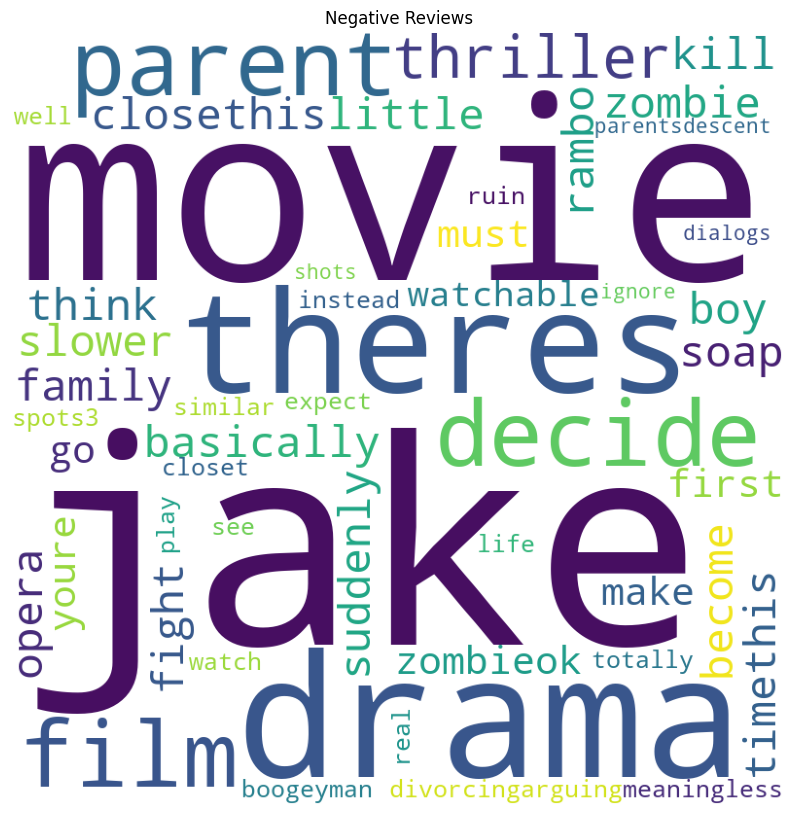

In [29]:
negative_df = df[df.label == 0]
negative_df = "".join(negative_df.cleaned.values[0])

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(negative_df)

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.title("Negative Reviews")
plt.axis('off')
plt.tight_layout(pad=0)

# Show the plot
plt.show()

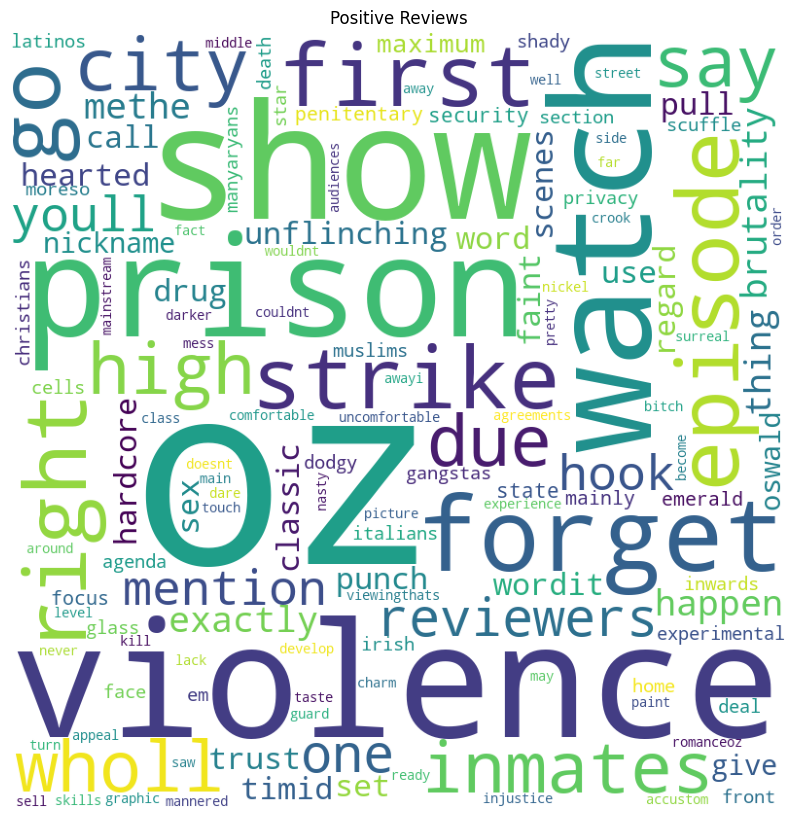

In [30]:
negative_df = df[df.label == 1]
negative_df = "".join(negative_df.cleaned.values[0])

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(negative_df)

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.title("Positive Reviews")
plt.axis('off')
plt.tight_layout(pad=0)

# Show the plot
plt.show()

This plot is called word cloud plot. It is mainly created to understand the most common words in a text. Here, the size of the text in this plot represents the frequency of the occurence of the text.

<B> Now that we have properly cleaned our dataset, it is time to create vocabulary for our words next

In [31]:
# lets get all of the cleaned reviews volumn values
complete_reviews = df.cleaned.values

In [32]:
# combining all words with whitespaces as seperatuion
all_words = ' '.join(complete_reviews)

In [36]:
len(all_words)

5973895

In [33]:
# converting to the list
all_words = all_words.split()

In [34]:
# lets too at first 20 words
all_words[:20]

['one',
 'reviewers',
 'mention',
 'watch',
 '1',
 'oz',
 'episode',
 'youll',
 'hook',
 'right',
 'exactly',
 'happen',
 'methe',
 'first',
 'thing',
 'strike',
 'oz',
 'brutality',
 'unflinching',
 'scenes']

In [37]:
from collections import Counter

Next, we will proceed to get the number of counts a word appears in the text corpus. We can calculate that using Counter library, which is a built-in python library. <b> We will proceed to start the index of our unique words from 1. This is so to make sure that we will use the index postiion 0 for the padding `<PAD>` token.

In [38]:
# passing all words to Counter function to count the frequency of each word in the list.
counter = Counter(all_words)

In [39]:
counter

Counter({'one': 49988,
         'reviewers': 496,
         'mention': 2972,
         'watch': 26886,
         '1': 2073,
         'oz': 247,
         'episode': 3003,
         'youll': 2558,
         'hook': 572,
         'right': 6480,
         'exactly': 1939,
         'happen': 6869,
         'methe': 93,
         'first': 16775,
         'thing': 8818,
         'strike': 967,
         'brutality': 134,
         'unflinching': 30,
         'scenes': 10057,
         'violence': 1957,
         'set': 7118,
         'word': 3493,
         'go': 26725,
         'trust': 686,
         'show': 21250,
         'faint': 115,
         'hearted': 125,
         'timid': 45,
         'pull': 1843,
         'punch': 521,
         'regard': 925,
         'drug': 1619,
         'sex': 3176,
         'hardcore': 249,
         'classic': 3395,
         'use': 9802,
         'wordit': 2,
         'call': 5383,
         'nickname': 83,
         'give': 17142,
         'oswald': 28,
         'maximum':

In [44]:
''' 
We are creating a list that is sorted in the descending order based on the frequency of the words occurrance. 
'''

frequency_of_words_sorted = sorted(counter, key=counter.get, reverse=True)

In [47]:
# creates a dictionary that maps integer IDs to each word in the vocabulary. The enumerate function assigns a unique integer ID to each word, starting from 1.
converting_integers_and_words = dict(enumerate(frequency_of_words_sorted, 1))

In [48]:
# here, we add a padding token with ID 0 to the dictionary, which will be used later for padding sequences of different lengths.
converting_integers_and_words[0] = '<PAD>' 

In [52]:
# this code will create a dictionary that maps each word in the vocabulary to its corresponding integer ID.
converting_integers_and_words = {word: id for id, word in converting_integers_and_words.items()}

In [53]:
converting_integers_and_words

{'film': 1,
 'movie': 2,
 'one': 3,
 'make': 4,
 'like': 5,
 'see': 6,
 'get': 7,
 'time': 8,
 'good': 9,
 'character': 10,
 'watch': 11,
 'go': 12,
 'even': 13,
 'would': 14,
 'think': 15,
 'really': 16,
 'story': 17,
 'show': 18,
 'look': 19,
 'say': 20,
 'much': 21,
 'well': 22,
 'know': 23,
 'end': 24,
 'people': 25,
 'great': 26,
 'bad': 27,
 'also': 28,
 'give': 29,
 'take': 30,
 'play': 31,
 'first': 32,
 'love': 33,
 'act': 34,
 'dont': 35,
 'come': 36,
 'find': 37,
 'movies': 38,
 'could': 39,
 'way': 40,
 'seem': 41,
 'many': 42,
 'want': 43,
 'work': 44,
 'plot': 45,
 'two': 46,
 'never': 47,
 'little': 48,
 'try': 49,
 'best': 50,
 'ever': 51,
 'life': 52,
 'better': 53,
 'man': 54,
 'still': 55,
 'scene': 56,
 'feel': 57,
 'scenes': 58,
 'part': 59,
 'use': 60,
 'something': 61,
 'lot': 62,
 'back': 63,
 'interest': 64,
 'real': 65,
 'im': 66,
 'guy': 67,
 'doesnt': 68,
 'thing': 69,
 'didnt': 70,
 'actors': 71,
 'years': 72,
 'leave': 73,
 'actually': 74,
 'cast': 75,
 'f

Now, we will proceed to encode the reviews. we will do so by convert each token into different corresponding index in the vocabulary array.

In [54]:
# Let us encode each word
encoded_reviews = [[converting_integers_and_words[word] for word in individual_review.split()] for individual_review in tqdm(complete_reviews)]

100%|██████████| 50000/50000 [00:02<00:00, 24596.43it/s]


In [55]:
unique_lengths = set([len(i) for i in encoded_reviews])

<b> This further proves that we need to ensure all sequences are of equal length, which we will do later 

In [58]:
# lets print the first 10 words of the first 10 reviews we have in our data 
for i in range(0, 10):
    print(encoded_reviews[i][:10])

[3, 1692, 328, 11, 468, 2953, 325, 384, 1504, 111]
[305, 48, 283, 1, 2608, 14832, 76541, 1097, 29, 3107]
[15, 305, 40, 344, 8, 789, 1254, 2079, 308, 632]
[593, 145, 156, 48, 358, 3108, 15, 145, 911, 43648]
[76548, 28362, 33, 8, 203, 1873, 1014, 1, 11, 365]
[154, 3211, 425, 2, 17, 37691, 2099, 6581, 3109, 474]
[171, 14, 5, 6, 7475, 634, 53488, 133, 6477, 544]
[18, 337, 76559, 233, 872, 32, 632, 32, 1091, 1098]
[2271, 989, 319, 1, 19, 782, 11, 1, 27, 772]
[5, 127, 2266, 6116, 1919, 5, 2, 101, 86, 33]


Here, we have sucessfully converted the text in each row into individual tokens based on index positions in our vocabulary. However, our tokens are of different lengths. Meaning that not all reviews have the same length. Some might be too large whereas some will be very smaller. Therefore, we need to predefine the maximum possible length of any given sequence. If a particular review is shorter than the predefined length, we will proceed to pad the sequence else we will trim the sequence or review respetively

In [59]:
# padding sequences
def paddind_sequences(cleaned_text, padding_value, max_length_of_sequence=256):
    '''
    The code below will create a 2D numpy array called new_feature with dimensions (len(reviews), seq_length), filled with the padding ID pad_id. 
    Therefore, we can use this 2d array to replace the corresponidng sequences at respective indexes whereas unused elements for sequences shorter than 256 will be padded.
    '''
    new_feature = np.full((len(cleaned_text), max_length_of_sequence), padding_value, dtype=int)
    '''
    pads each sequence with the padding ID pad_id up to the desired seq_length. The code first converts the current sequence to a
      numpy array using np.array(row), then takes the first seq_length elements (if the sequence is longer than seq_length), and assigns 
      this to the corresponding row in features. This way, sequences shorter
      than seq_length are padded with the pad_id at the end of the sequence, and longer sequences are truncated to seq_length.
    '''
    for i, row in enumerate(cleaned_text):
        new_feature[i, :len(row)] = np.array(row)[:max_length_of_sequence]
    return new_feature

In [116]:
max_length_of_sequence = 256

# returns the final 2D numpy array where each row represents a padded sequence.
features = paddind_sequences(encoded_reviews, padding_value=converting_integers_and_words['<PAD>'], max_length_of_sequence=max_length_of_sequence)

`In this case, the maximum sequence length of 256 was likely chosen based on some analysis of the distribution of sequence lengths in the input data, as well as the available hardware resources. A sequence length of 256 is relatively long and should be sufficient to capture most of the information in the input data, while still being computationally tractable. The reason we choose to make the maximum length of a sequence to be 256 is based on the maximum length of a review in our dataset. We also had to consider the limitations of our hardware becuase longer sequencecs could contain more information, but also might be more computationally expensive. Whereas, shorter sequences might be less computationally expensive but might contain very less information. So, choosing the maximum length of a sequence depends upon a variety of factors respectively.`

In [117]:
# get labels as numpy
targets = df.label.to_numpy()
targets

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

## Train Test Split

In [118]:
from sklearn.model_selection import train_test_split

In [121]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=42)

In [122]:
# Split the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [123]:
print("The shapes for Training set: ", X_train.shape, y_train.shape)

The shapes for Training set:  (35000, 256) (35000,)


In [124]:
print("The shapes for Validation set: ", X_val.shape, y_val.shape)

The shapes for Validation set:  (7500, 256) (7500,)


In [125]:
print("The shapes for Test set: ", X_test.shape, y_test.shape)

The shapes for Test set:  (7500, 256) (7500,)


We have successfully divided our data into train, test, and valdiation set. Now, we will proceed to convert it into pytorch dataloader with a certain batch size for performing minibatch gradient descent.

In [126]:
from torch.utils.data import TensorDataset, DataLoader

In [127]:
batch_size = 512

In [128]:
# Lets create tensordatasetss
training_set = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
validation_set = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
testing_set = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

In [129]:
# lets proceed to create pytorch dataloaders next.
train_dl = DataLoader(training_set, shuffle=True, batch_size=batch_size)
val_dl = DataLoader(validation_set, shuffle=True, batch_size=batch_size)
test_dl = DataLoader(testing_set, shuffle=True, batch_size=batch_size)

# Building LSTM

In [130]:
import torch.nn.functional as F

In [135]:
class LSTM(nn.Module):
    def __init__(self, vocab_size, output_size, hidden_size=128, embedding_size=400, n_layers=2, dropout=0.2):
        super(LSTM, self).__init__()

        # Define an embedding layer that maps each token to a dense vector of embedding_size
        self.embedding_layer = nn.Embedding(vocab_size, embedding_size)

        # Define an LSTM layer with hidden_size hidden units, n_layers layers, and a dropout rate of dropout
        self.lstm_layer = nn.LSTM(embedding_size, hidden_size, n_layers, dropout=dropout, batch_first=True)

        # Define a dropout layer with dropout probability of dropout
        self.dropout_layer = nn.Dropout(p=dropout)

        # Define a linear layer that maps the output of the LSTM to the output_size
        self.fully_connected_laeyer = nn.Linear(hidden_size, output_size)

        # Define a sigmoid activation function
        self.sigmoid_layer = nn.Sigmoid()

    def forward(self, input_seq):
        
        # Convert the input to a LongTensor
        input_seq = input_seq.long()

        # Embed the input sequence to a sequence of dense vectors of embedding_size
        input_seq = self.embedding_layer(input_seq)

        # Feed the embedded sequence through the LSTM layer
        output, _ = self.lstm_layer(input_seq)

        # Select only the last output of the LSTM as the final output
        output = output[:, -1, :]

        # Apply dropout to the output
        output = self.dropout_layer(output)

        # Feed the output through the linear layer to get the logits
        output = self.fully_connected_laeyer(output)

        # Apply sigmoid activation to get the final output probabilities
        output = self.sigmoid_layer(output)

        return output


    1. The embedding layer maps each token (word) in the input sequence to a dense vector representation of a specified size (embedding_size).


    2. The embedding layer helps capture the semantic meaning and relationships between words in the input sequence.

    3. The LSTM layer has hidden_size number of hidden units, n_layers layers, and utilizes dropout regularization with a dropout rate of dropout.
        hidden_size = number of hidden cells
        n_layers = number of stacked LSTM layers 
        batch_first = batch lai first dimension rakheko


    4. The hidden_size parameter determines the number of hidden units or cells in a single LSTM layer.
    5. The n_layers parameter refers to the number of LSTM layers stacked on top of each other in the network.

    6. output = output[:, -1, :]

        This is done because often in sequence models, we are interested in capturing the final representation of the input sequence to make predictions or perform downstream tasks.   



We have created the LSTM neural network, which is a specific type of RNN developed to solve the problem of vanishing and exploding gradients. Here, we have added the embedding layer to reduve the dimensionality of the vocabulary by learning its representation. LSTM will be our main layer as a RNN. The dropout layer will perform regularization for preventing overfitting. Finally, a fully connected layer is used to classify between positive and negative sentiments respectively.

In [131]:
# define training device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
len(converting_integers_and_words)

In [133]:
# model hyperparamters
vocab_size = len(converting_integers_and_words)
output_size = 1
embedding_size = 256
hidden_size = 512
n_layers = 2
dropout=0.2
weight_decay=None

In [136]:
# model initialization
model = LSTM(vocab_size, output_size, hidden_size, embedding_size, n_layers, dropout)
model = model.to(device)
print(model)

LSTM(
  (embedding_layer): Embedding(234645, 256)
  (lstm_layer): LSTM(256, 512, num_layers=2, batch_first=True, dropout=0.2)
  (dropout_layer): Dropout(p=0.2, inplace=False)
  (fully_connected_laeyer): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid_layer): Sigmoid()
)


<b> Due to some issues with PyTorch, we have instead created model summary for equivalent LSTM model in Keras and Tensorflow. 

![ModelSummary](Picture1.jpg)


In [2]:
pwd

'C:\\Users\\Lenovo\\Desktop'

<b> This is the model summary of the LSTM model.

# Model Training

In [ ]:
'''
The learning rate of 0.001 was selected with binary cross entropy as loss function. Additionally,adam optimizer was choosen as the optimization function
'''
lr = 0.001
criterion = nn.BCELoss()  
optim = torch.optim.Adam(model.parameters(), lr=lr)
grad_clip = 5
epochs = 20

In [ ]:
device

device(type='cuda')

In [ ]:
sigmoid_activation = nn.Sigmoid() # activation function for binary classification

In [ ]:
# train loop
train_losses = []
train_accs = []
val_losses = []
val_accs = []

best_val_loss = float('inf')
patience = 7
early_stopping_counter = 0

for epoch in range(epochs):

    model.train()

    train_loss = 0
    train_acc = 0

    for feature, target in tqdm(train_dl):
        # move to device
        feature, target = feature.to(device), target.to(device)

        # reset optimizer
        optim.zero_grad()

        # forward pass
        out = model(feature)

        # acc
        predicted = torch.tensor([1 if i == True else 0 for i in out > 0.5], device=device)
        equals = predicted == target
        acc = torch.mean(equals.type(torch.FloatTensor))
        train_acc += acc.item()

        # loss
        loss = criterion(out.squeeze(), target.float())
        train_loss += loss.item()
        loss.backward()

        # clip grad
        nn.utils.clip_grad_norm_(model.parameters(), grad_clip)

        # update optimizer
        optim.step()

        # free some memory
        del feature, target, predicted

    train_loss = train_loss / len(train_dl)
    train_acc = train_acc / len(train_dl)
    train_losses.append(train_loss)
    train_accs.append(train_acc)


    model.eval()

    val_loss = 0
    val_acc = 0

    with torch.no_grad():
        for feature, target in val_dl:            
            # move to device
            feature, target = feature.to(device), target.to(device)

            # forward pass
            out = model(feature)

            # acc
            predicted = torch.tensor([1 if i == True else 0 for i in out > 0.5], device=device)
            equals = predicted == target
            acc = torch.mean(equals.type(torch.FloatTensor))
            val_acc += acc.item()

            # loss
            loss = criterion(out.squeeze(), target.float())
            val_loss += loss.item()

            # free some memory
            del feature, target, predicted

    val_loss = val_loss / len(val_dl)
    val_acc = val_acc / len(val_dl)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}:")
    print(f"Training Loss: {train_loss:.4f} | Training Accuracy: {train_acc*100:.4f}%")
    print(f"Validation Loss: {val_loss:.4f} | Validation Accuracy: {val_acc*100:.4f}%")

    ''' IMPLEMENTEING CUSTOM EARLY STOPPING '''
    if val_loss < best_val_loss:
        early_stopping_counter = 0
        best_val_loss = val_loss
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= patience:
            print(f"Early stopping triggered after {patience} epochs without improvement.")
            break


100%|██████████| 69/69 [01:01<00:00,  1.12it/s]


Epoch 1:
Training Loss: 0.6947 | Training Accuracy: 50.2833%
Validation Loss: 0.6941 | Validation Accuracy: 49.1563%


100%|██████████| 69/69 [01:04<00:00,  1.07it/s]


Epoch 2:
Training Loss: 0.6905 | Training Accuracy: 51.3345%
Validation Loss: 0.6941 | Validation Accuracy: 49.3982%


100%|██████████| 69/69 [01:06<00:00,  1.04it/s]


Epoch 3:
Training Loss: 0.6797 | Training Accuracy: 52.5180%
Validation Loss: 0.6994 | Validation Accuracy: 49.7857%


100%|██████████| 69/69 [01:05<00:00,  1.05it/s]


Epoch 4:
Training Loss: 0.6654 | Training Accuracy: 53.2681%
Validation Loss: 0.7121 | Validation Accuracy: 49.7336%


100%|██████████| 69/69 [01:06<00:00,  1.04it/s]


Epoch 5:
Training Loss: 0.6465 | Training Accuracy: 54.2673%
Validation Loss: 0.7425 | Validation Accuracy: 51.8046%


100%|██████████| 69/69 [01:07<00:00,  1.02it/s]


Epoch 6:
Training Loss: 0.6624 | Training Accuracy: 57.1383%
Validation Loss: 0.6894 | Validation Accuracy: 65.7034%


100%|██████████| 69/69 [01:06<00:00,  1.03it/s]


Epoch 7:
Training Loss: 0.6454 | Training Accuracy: 56.1019%
Validation Loss: 0.7343 | Validation Accuracy: 51.4367%


100%|██████████| 69/69 [01:07<00:00,  1.03it/s]


Epoch 8:
Training Loss: 0.6400 | Training Accuracy: 54.4198%
Validation Loss: 0.7651 | Validation Accuracy: 49.6484%


100%|██████████| 69/69 [01:07<00:00,  1.03it/s]


Epoch 9:
Training Loss: 0.6399 | Training Accuracy: 54.4997%
Validation Loss: 0.7723 | Validation Accuracy: 50.1291%


100%|██████████| 69/69 [01:07<00:00,  1.02it/s]


Epoch 10:
Training Loss: 0.6291 | Training Accuracy: 58.2234%
Validation Loss: 0.7395 | Validation Accuracy: 52.5152%


100%|██████████| 69/69 [01:07<00:00,  1.03it/s]


Epoch 11:
Training Loss: 0.5709 | Training Accuracy: 71.6408%
Validation Loss: 0.6038 | Validation Accuracy: 73.6182%


100%|██████████| 69/69 [01:07<00:00,  1.02it/s]


Epoch 12:
Training Loss: 0.5196 | Training Accuracy: 75.0151%
Validation Loss: 0.5388 | Validation Accuracy: 76.9028%


100%|██████████| 69/69 [01:07<00:00,  1.02it/s]


Epoch 13:
Training Loss: 0.4362 | Training Accuracy: 80.5441%
Validation Loss: 0.5230 | Validation Accuracy: 78.4741%


100%|██████████| 69/69 [01:07<00:00,  1.02it/s]


Epoch 14:
Training Loss: 0.3738 | Training Accuracy: 84.6499%
Validation Loss: 0.4600 | Validation Accuracy: 82.0021%


100%|██████████| 69/69 [01:07<00:00,  1.02it/s]


Epoch 15:
Training Loss: 0.2825 | Training Accuracy: 89.2924%
Validation Loss: 0.4388 | Validation Accuracy: 83.3573%


100%|██████████| 69/69 [01:08<00:00,  1.01it/s]


Epoch 16:
Training Loss: 0.2464 | Training Accuracy: 90.8059%
Validation Loss: 0.4490 | Validation Accuracy: 83.5272%


100%|██████████| 69/69 [01:07<00:00,  1.02it/s]


Epoch 17:
Training Loss: 0.2002 | Training Accuracy: 92.9719%
Validation Loss: 0.4467 | Validation Accuracy: 84.1284%


100%|██████████| 69/69 [01:07<00:00,  1.02it/s]


Epoch 18:
Training Loss: 0.1562 | Training Accuracy: 94.7661%
Validation Loss: 0.4746 | Validation Accuracy: 84.2988%


100%|██████████| 69/69 [01:07<00:00,  1.02it/s]


Epoch 19:
Training Loss: 0.1336 | Training Accuracy: 95.5970%
Validation Loss: 0.4704 | Validation Accuracy: 84.6258%


100%|██████████| 69/69 [01:07<00:00,  1.02it/s]


Epoch 20:
Training Loss: 0.1042 | Training Accuracy: 96.7434%
Validation Loss: 0.5149 | Validation Accuracy: 84.5060%


In [83]:
# val_accs = [49.1563, 49.3982, 49.7857, 49.7336, 51.8046, 65.7034, 51.4367, 49.6484, 50.1291, 52.5152,73.6182, 76.9028, 78.4741, 82.0021, 83.3573, 83.5272, 84.1284,84.2988, 84.6258, 84.5060]
# val_losses = [0.6941 , 0.6941 , 0.6994 ,0.6654, 0.7425 ,0.6894 , 0.7343 , 0.7651 ,0.7723 ,0.7395 ,0.6038 , 0.5388 ,0.5230 ,0.4600 ,0.4388 , 0.4490 , 0.4467 , 0.4746 , 0.4704 , 0.5149]

In [ ]:
torch.save(model.state_dict(), 'LSTM_20Epochs.pth')
!cp LSTM_20Epochs.pth /content/drive/MyDrive/AI_Coursework_Portfolio_Dataset

In [89]:
training_stats = pd.DataFrame({"Training_Accuracy": train_accs,
                               "Training_Loss": train_losses,
                               "Val_Loss": val_losses,
                               "Val_Accuracy": val_accs})

training_stats.to_csv("LSTM_Training Statistics.csv", index = True)

In [90]:
training_stats.head()

,Training_Accuracy,Training_Loss,Val_Loss,Val_Accuracy
0,50.283308,0.694711,0.6941,49.1563
1,51.334451,0.690464,0.6941,49.3982
2,52.518017,0.679706,0.6994,49.7857
3,53.268131,0.665419,0.6654,49.7336
4,54.267338,0.646485,0.7425,51.8046


Text(0.5, 0.95, 'LSTM Performance on Training and Validation Datasets')

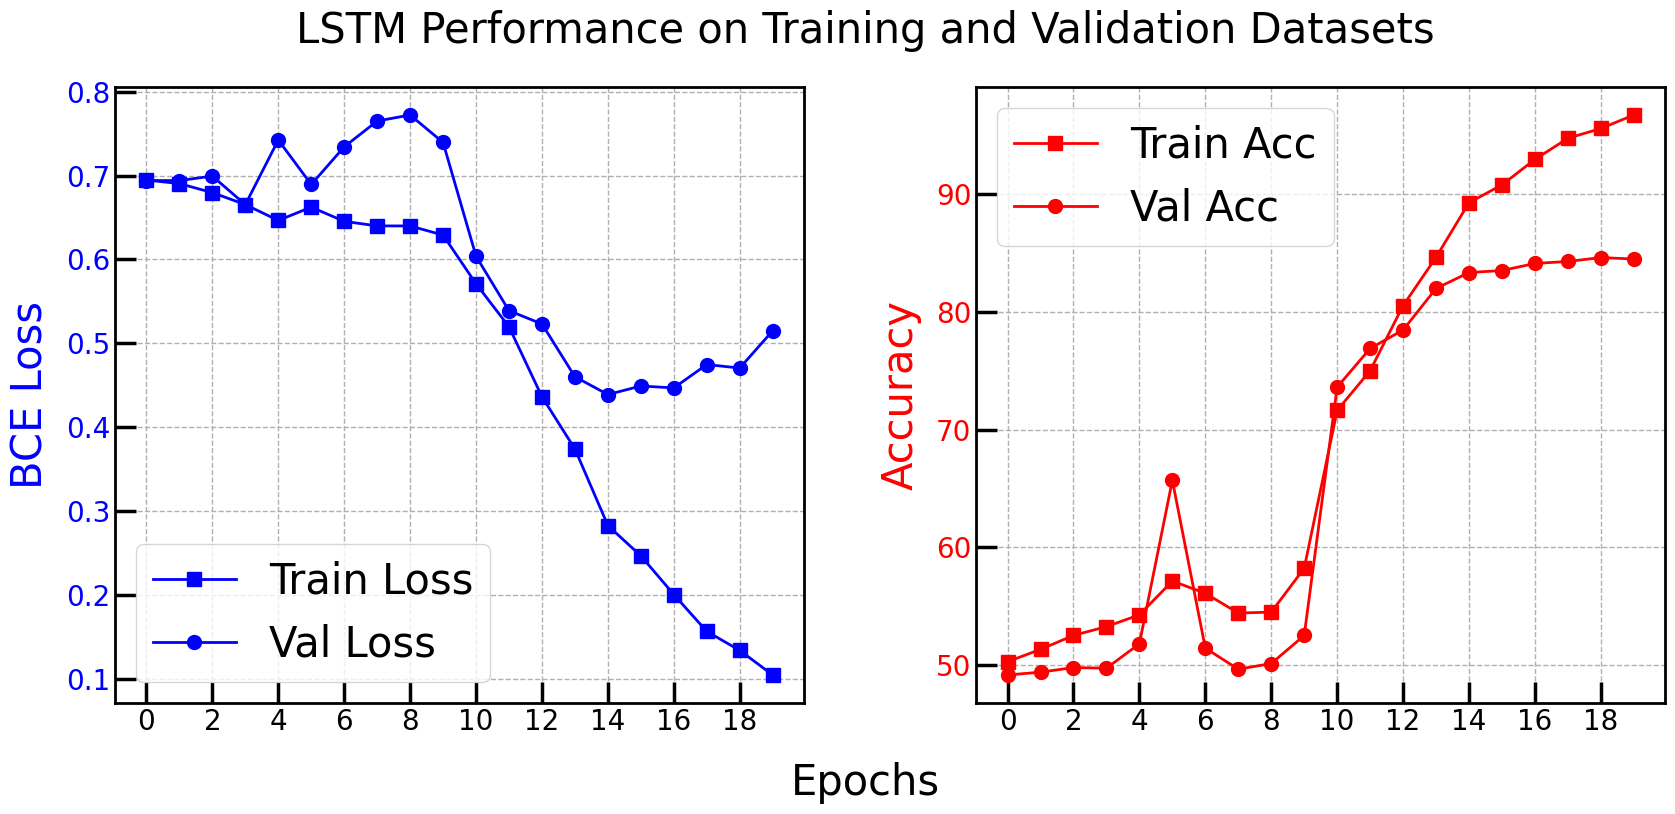

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

ax1 = plt.subplot(1,2, 1)

''' Left plot contains the validation and training lossess '''
plot_1 = ax1.plot(range(0, 20), training_stats['Training_Loss'], color = 'blue', label = 'Train Loss',\
             marker = 's', linewidth=2.0, markersize = 10)

plot_2 = ax1.plot(range(0, 20), training_stats['Val_Loss'], color = 'blue', label = 'Val Loss',\
             marker = 'o', linewidth=2.0, markersize = 10)

ax1.tick_params(axis ='y', labelcolor = 'blue',labelsize=20, width=3) 
ax1.tick_params(axis ='x', labelcolor = 'black',labelsize=20, width=3)
ax1.legend(fontsize = 30)
plt.xticks(range(0,20, 2))
# ax1.set_xlim([-1, 30])
ax1.set_ylabel("BCE Loss", fontsize = 30, labelpad = 10, color = 'blue')


''' Right plot contains the training and validation accuracies '''
ax1a = plt.subplot(1,2, 2)
plot_11 = ax1a.plot(range(0, 20), training_stats['Training_Accuracy'], color = 'red', label = 'Train Acc',\
             marker = 's', linewidth=2.0, markersize = 10)

plot_22 = ax1a.plot(range(0, 20), training_stats['Val_Accuracy'], color = 'red', label = 'Val Acc',\
             marker = 'o', linewidth=2.0, markersize = 10)
ax1a.legend(fontsize = 30)
plt.xticks(range(0,20,2))
# ax1a.set_xlim([-1, 30])
ax1a.tick_params(axis ='y', labelcolor = 'red',labelsize=20, width=3) 
ax1a.tick_params(axis ='x', labelcolor = 'black',labelsize=20, width=3)
ax1a.set_ylabel("Accuracy", fontsize = 30, labelpad = 10, color = 'red')


# for ax1 
ax1.tick_params(which='both', width=2.5)
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=5)
ax1.tick_params(which = 'both', direction = 'in')

# for ax1a
ax1a.tick_params(which='both', width=2.5)
ax1a.tick_params(which='major', length=15)
ax1a.tick_params(which='minor', length=5)
ax1a.tick_params(which = 'both', direction = 'in') 

# set various colors
ax1a.spines['bottom'].set_color('black')
ax1a.spines['top'].set_color('black') 
ax1a.spines['right'].set_color('black')
ax1a.spines['right'].set_linewidth(2)
ax1a.spines['top'].set_linewidth(2)
ax1a.spines['bottom'].set_linewidth(2)
ax1a.spines['left'].set_color('black')
ax1a.spines['left'].set_lw(2)

# set various colors
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black') 
ax1.spines['right'].set_color('black')
ax1.spines['right'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_color('black')
ax1.spines['left'].set_lw(2)


ax1.grid(True, which = 'major', alpha = 1, linestyle='--', linewidth = 1)
ax1a.grid(True, which = 'major', alpha = 1, linestyle='--', linewidth = 1)


plt.subplots_adjust(wspace=0.25,hspace=0.)
fig.text(0.5, 0.01, 'Epochs', ha='center', va='center', fontsize = 30)

fig.text(0.5, 0.95, 'LSTM Performance on Training and Validation Datasets', ha='center', va='center', fontsize = 30)

As we can see, the train loss and validation set are decreasing as we train the model for 20 epochs. If we see clearly, the traininig loss is still decreasing whereas the validation loss is starting to diverge. Perhaps the model is starting to overfit. The accuracy plot shows that the model's accuracy on both training and validation dataset is increasing steadily.

# Model Evaluation 

In [114]:
'''
This function takes in a trained model and a dataloader and makes predictions

'''

def make_predictions_on_dataloaders(trained_model, dataloader):
    target = []
    probabilities = []
    predictions = []
    pred_probs_for_all_class = []

    with torch.no_grad():
        trained_model.eval()
        for features_, labels in tqdm(dataloader):
            features_ = features_.to(device)
            labels = labels.to(device)
            yb = trained_model(features_)
            probs = yb.cpu().detach().numpy()
            preds = (probs >= 0.5).astype(int)  # threshold at 0.5 for binary classification
            target.append(labels.cpu().detach().numpy())
            probabilities.append(probs)
            predictions.append(preds)
            pred_probs_for_all_class.append(np.concatenate((1-probs, probs), axis=1))  # add negative class predictions

    return target, probabilities, predictions, pred_probs_for_all_class

In [116]:
target, probabilities, predictions, pred_probs_for_all_class = make_predictions_on_dataloaders(model, testloader)

100%|██████████| 15/15 [00:04<00:00,  3.51it/s]


In [121]:
def flatten(input_arr):
    output = []
    for i in input_arr:
        for j in i:
            output.append(j)
    return output

In [122]:
predictions = flatten([list(i) for i in predictions])
target = flatten([list(i) for i in target])
probabilities = flatten([list(i) for i in probabilities])
pred_probs_for_all_class = np.array(flatten(pred_probs_for_all_class))

In [124]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve, precision_score, recall_score, f1_score

In [125]:
print("The testing accuracy is: {}".format(accuracy_score(target, predictions)*100))

The testing accuracy is: 84.50666666666666


Our LSTM model has achieved a test accuacy of almost 84.5%, which is very good.

In [126]:
print("Precision (Test): ", precision_score(target, predictions, average = 'weighted'))
print("Recall (Test): ", recall_score(target, predictions, average = 'weighted'))
print("F1 (Test): ", f1_score(target, predictions, average = 'weighted'))

Precision (Test):  0.845088204369394
Recall (Test):  0.8450666666666666
F1 (Test):  0.8450687820616207


<b> Additionally, the model has also achieved a precision, recall, and f1 scores of about 84.5% each respectively.

In [127]:
print("Classification Report")
print(classification_report(target, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      3722
           1       0.85      0.84      0.85      3778

    accuracy                           0.85      7500
   macro avg       0.85      0.85      0.85      7500
weighted avg       0.85      0.85      0.85      7500



The above classification report shows the precision, recall and f1 score of the LSTM for each class in test dataset.

The choice of precision over recall depends upon the problem statement. Lets suppose that I am building a flower
classification model to identify toxic or dangerous plants, it may be more important to have high precision. This is to ensure
that I can minimize false positives and avoid misclassifying a safe plant as dangerous. However, if I am building a model to
identify rare or endangered plant species, it might be in my interest to have high recall, so that I am able to identify as many
positive cases as possible, even if it results in some false positives.

In [130]:
cf_matrix = confusion_matrix(target, predictions)
dataframe = pd.DataFrame(cf_matrix, index = ['Negative', 'Positive'], columns = ['Negative', 'Positive'])

In [131]:
dataframe

,Negative,Positive
Negative,3153,569
Positive,593,3185


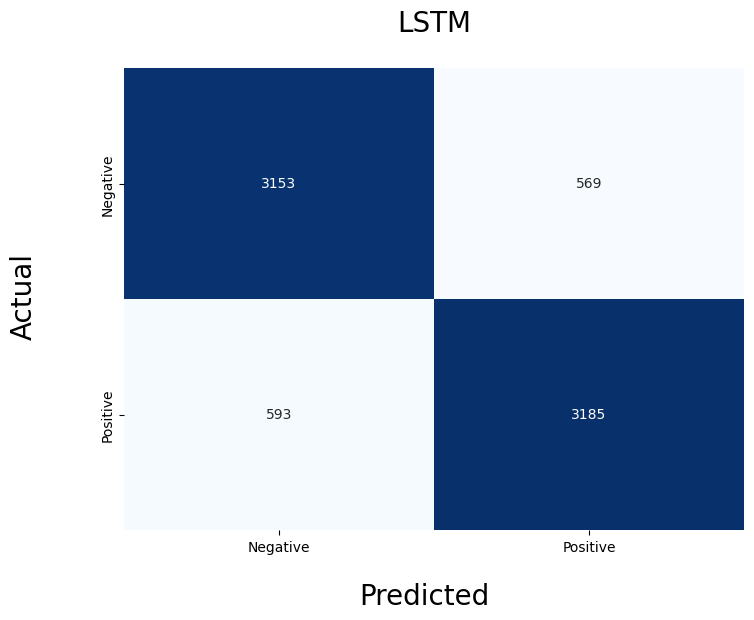

In [133]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

ax1 = plt.subplot(1, 1, 1)

sns.heatmap(dataframe, cmap="Blues", annot = True, fmt="d", cbar =False)
fig.text(0.5, 0.00, 'Predicted', ha='center', va='center', fontsize = 20)
fig.text(0.0, 0.5, 'Actual', ha='center', va='center', rotation='vertical', fontsize = 20)
ax1.text(0.5, 1.08, 'LSTM',
    horizontalalignment='center',
    fontsize=20,
    transform = ax1.transAxes);

The model has a very high levels of true positive and negative predictions. Additionally, The model predicted 593 samples as negative class when infact they were postive reviews. Similarlty, the model predicted 569 samples as positive reviews when infact those samples were negative reviews respectively.

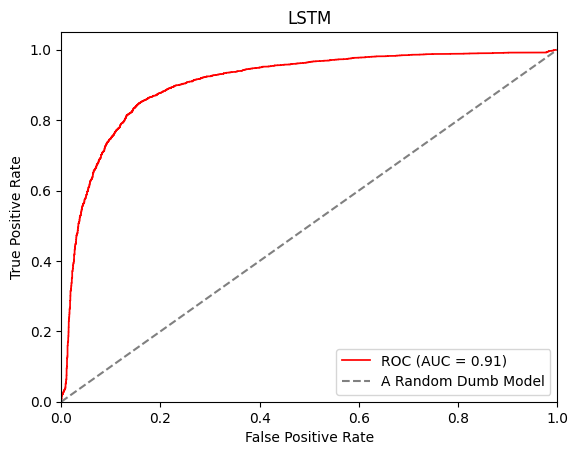

In [137]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_test are the true labels and y_score are the predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(target, probabilities, pos_label=1)

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, lw=1.25, label='ROC (AUC = %0.2f)' % (roc_auc), color = 'red')
plt.plot([0, 1], [0, 1], '--', color='gray', label='A Random Dumb Model')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LSTM')
plt.legend(loc="lower right")
plt.show()

In [139]:
auc_score_ovr = roc_auc_score(target, probabilities)
print("AUC SCORE (Test Set): {}".format(auc_score_ovr))

AUC SCORE (Test Set): 0.9059854074708947


An auc score of 0.5 means that our model is making random predictions. Similarly, an auc score of 0 means that the model is
predicting positive classes and negative and vice versa. An auc score of about 94.4 % means that the model has good ability to
diffrentiate between positive and negative classes.
An AUC score of 0.9 indicates that the model has a high probability of correctly ranking a randomly chosen positive instance
higher than a randomly chosen negative instance. Specifically, if a positive instance is randomly selected from the dataset and
compared to a negative instance that was also randomly selected, then there is a 90% chance that the model will assign a
higher predicted probability to the positive instance than to the negative instance.

Therefore, an AUC score of 0.9 suggests that the model is highly capable of distinguishing between the positive and negative
classes, and it has a high true positive rate while maintaining a low false positive rate, which is desirable for many
classification tasks.

# Results and Prediction

In [140]:
def predict_sentiment(text):
  text = custom_preprocessing_pipeline(custom_cleaning_pipeline(text))
  text = [[converting_integers_and_words[word] for word in text.split() if word in converting_integers_and_words.keys()]]
  text = paddind_sequences(text, pad_id=converting_integers_and_words['<PAD>'], seq_length=max_length_of_sequence)
  text_tensor = torch.tensor(text).to(device)
  
  return model(text_tensor).cpu().detach().numpy()

In [142]:
classes = ['Negative', 'Positive']

In [145]:
text = 'The movie is very good. The actors were good. I loved the movie'
prob = predict_sentiment(text)[0][0]
pred = 1 if prob >= 0.5 else 0 

if pred == 0:
  prob = 1 - prob
print("The predicted class is {}, with a predicted probability of {}.".format(classes[pred], round(prob, 5)))

The predicted class is Positive, with a predicted probability of 0.9912099838256836.


In [146]:
text = 'The movie is very bad. The actors were pathetic. I think I wasted my money on this movie.'
prob = predict_sentiment(text)[0][0]
pred = 1 if prob >= 0.5 else 0 

if pred == 0:
  prob = 1 - prob
print("The predicted class is {}, with a predicted probability of {}.".format(classes[pred], round(prob, 5)))

The predicted class is Negative, with a predicted probability of 0.9955.


<b> Lets make a single prediction from a real data

In [161]:
df.sample(1, random_state = 420)

,processed,label
10427,register imdb post comment awful movie ismy ca...,0


In [162]:
random_text = df['processed'].sample(1, random_state = 420).values[0];random_text

'register imdb post comment awful movie ismy cat ball string better storyline worst act ive ever see wipe almost entire cast movie within 5 minutes leave bite desire wasnt single scare moment movie exception watch movie halloween tv around seem like couldve good story roll credit say chasey lie bite loss didnt recognize right away scene already couldve say oh yeah im glad saw hotel didnt pay id real tick pay cent see normally like least find redeem factor movie one exception bad even amuse sogooditsbadits plain bad'

In [165]:
prob = predict_sentiment(random_text)[0][0]
pred = 1 if prob >= 0.5 else 0 

if pred == 0:
  prob = 1 - prob
print("The predicted class is {}, with a predicted probability of {}.".format(classes[pred], round(prob, 5)))

The predicted class is Negative, with a predicted probability of 0.99564.


# Conclusion

<b>We trained a LSTM classifier to perform sentiment analysis on a IMDB dataset. It was seen that a LSTM model is very much able to perform classification on sequential data. Traditional ML models like Random Forest and XGBoost might not perform well on such type of data whereas a recurrent neural network like LSTM is very much capable for capturing relationships in a sequential data.